In [680]:
# import the essentials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Dataset imports

### Air quality

In [681]:
# import air quality dataset
date_parser = lambda x: datetime.strptime(x, '%m/%d/%Y') # specify the date
df_air = pd.read_csv(
    "Air_Quality.csv",
    dtype={
        "Unique ID":"int64",
        "Indicator ID":"int64",
        "Geo Join ID":"int64",
        "Data Value":"float64",
    },
    parse_dates=["Start_Date"],
    date_parser=date_parser
)
df_air = df_air.drop(columns=["Message"])
print(df_air.dtypes)

Unique ID                  int64
Indicator ID               int64
Name                      object
Measure                   object
Measure Info              object
Geo Type Name             object
Geo Join ID                int64
Geo Place Name            object
Time Period               object
Start_Date        datetime64[ns]
Data Value               float64
dtype: object


In [682]:
# split date into day, month and year
df_air["Year"] = df_air.Start_Date.apply(lambda date: date.year)
df_air["Month"] = df_air.Start_Date.apply(lambda date: date.month)
df_air["Day"] = df_air.Start_Date.apply(lambda date: date.day)

# rename columns with spaces
df_air = df_air.rename(
    columns = {
        "Unique ID" : "UniqueID",
        "Indicator ID" : "IndicatorID",
        "Measure Info" : "MeasureInfo",
        "Geo Type Name" : "GeoTypeName",
        "Geo Join ID" : "GeoJoinID",
        "Geo Place Name" : "GeoPlaceName",
        "Time Period" : "TimePeriod",
        "Start_Date" : "StartDate",
        "Data Value" : "Value",
    }
)

df_air

,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,TimePeriod,StartDate,Value,Year,Month,Day
0,130355,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",UHF42,101,Kingsbridge - Riverdale,2005-2007,2005-01-01,117.70,2005,1,1
1,130356,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",UHF42,102,Northeast Bronx,2005-2007,2005-01-01,77.30,2005,1,1
2,130357,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",UHF42,103,Fordham - Bronx Pk,2005-2007,2005-01-01,67.30,2005,1,1
3,130358,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",UHF42,104,Pelham - Throgs Neck,2005-2007,2005-01-01,73.60,2005,1,1
4,130359,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",UHF42,105,Crotona -Tremont,2005-2007,2005-01-01,65.80,2005,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,2020-06-01,28.70,2020,6,1
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,2020-06-01,29.56,2020,6,1
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,2020-06-01,29.65,2020,6,1
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,2020-06-01,29.28,2020,6,1


### Asthma 2

In [683]:
# handmade column names to get around multi-indexing
cols = ["Location"]
for year in range(2005, 2017):
    for cat in ("0-4y","5-17y","0-17y"):
        col = f"{year}_{cat}"
        cols.append(col)
print(cols)

['Location', '2005_0-4y', '2005_5-17y', '2005_0-17y', '2006_0-4y', '2006_5-17y', '2006_0-17y', '2007_0-4y', '2007_5-17y', '2007_0-17y', '2008_0-4y', '2008_5-17y', '2008_0-17y', '2009_0-4y', '2009_5-17y', '2009_0-17y', '2010_0-4y', '2010_5-17y', '2010_0-17y', '2011_0-4y', '2011_5-17y', '2011_0-17y', '2012_0-4y', '2012_5-17y', '2012_0-17y', '2013_0-4y', '2013_5-17y', '2013_0-17y', '2014_0-4y', '2014_5-17y', '2014_0-17y', '2015_0-4y', '2015_5-17y', '2015_0-17y', '2016_0-4y', '2016_5-17y', '2016_0-17y']


In [684]:
# import dataset
dtypes = {col:("str" if i==0 else "int") for i,col in enumerate(cols)}
df_hosp2 = pd.read_csv("Asthma_total_data2.csv", sep=";", names=cols).iloc[2:,:]
df_hosp2 = df_hosp2.astype(dtypes)
df_hosp2.head()

,Location,2005_0-4y,2005_5-17y,2005_0-17y,2006_0-4y,2006_5-17y,2006_0-17y,2007_0-4y,2007_5-17y,2007_0-17y,...,2013_0-17y,2014_0-4y,2014_5-17y,2014_0-17y,2015_0-4y,2015_5-17y,2015_0-17y,2016_0-4y,2016_5-17y,2016_0-17y
0.0,New York City,5027,4656,9683,5164,4525,9689,4665,4194,8859,...,7738,3922,4106,8028,3514,3547,7061,3380,3373,6753
1.0,Bronx,1791,1594,3385,1766,1542,3308,1691,1476,3167,...,3166,1569,1691,3260,1407,1489,2896,1317,1340,2657
2.0,Brooklyn,1481,1414,2895,158,1424,3004,1309,1200,2509,...,2233,1147,1155,2302,1023,994,2017,977,990,1967
3.0,Manhattan,597,698,1295,654,605,1259,526,598,1124,...,901,460,482,942,400,421,821,416,440,856
4.0,Queens,1026,831,1857,1048,823,1871,1033,814,1847,...,1239,654,663,1317,602,540,1142,559,506,1650


In [685]:
# use regex to get the UHF code from location
def get_uhf_hosp2(location):
    re_s = re.search("\(.*?\)", location)
    if re_s: return location[re_s.span()[0]+1:-1]
    else: return 0

In [686]:
df_hosp2.head()

,Location,2005_0-4y,2005_5-17y,2005_0-17y,2006_0-4y,2006_5-17y,2006_0-17y,2007_0-4y,2007_5-17y,2007_0-17y,...,2013_0-17y,2014_0-4y,2014_5-17y,2014_0-17y,2015_0-4y,2015_5-17y,2015_0-17y,2016_0-4y,2016_5-17y,2016_0-17y
0.0,New York City,5027,4656,9683,5164,4525,9689,4665,4194,8859,...,7738,3922,4106,8028,3514,3547,7061,3380,3373,6753
1.0,Bronx,1791,1594,3385,1766,1542,3308,1691,1476,3167,...,3166,1569,1691,3260,1407,1489,2896,1317,1340,2657
2.0,Brooklyn,1481,1414,2895,158,1424,3004,1309,1200,2509,...,2233,1147,1155,2302,1023,994,2017,977,990,1967
3.0,Manhattan,597,698,1295,654,605,1259,526,598,1124,...,901,460,482,942,400,421,821,416,440,856
4.0,Queens,1026,831,1857,1048,823,1871,1033,814,1847,...,1239,654,663,1317,602,540,1142,559,506,1650


In [687]:
# melt dataset such that each row is a sample (like the other datasets)
df_hosp2_melted = df_hosp2.melt(id_vars="Location", value_vars=list(df_hosp2.columns[1:]), var_name="Year and age", value_name="n")

# rename and split year and age. convert dtypes
df_hosp2_melted["Year"] = df_hosp2_melted["Year and age"].str[0:4].astype("int")
df_hosp2_melted["AgeGroup"] = df_hosp2_melted["Year and age"].str[5:].astype("str")
df_hosp2_melted["Uhf"] = df_hosp2_melted.Location.apply(get_uhf_hosp2)
df_hosp2_melted["Uhf"] = df_hosp2_melted["Uhf"].astype("int")
print(df_hosp2_melted.dtypes)

df_hosp2_melted

Location        object
Year and age    object
n                int64
Year             int64
AgeGroup        object
Uhf              int64
dtype: object


,Location,Year and age,n,Year,AgeGroup,Uhf
0,New York City,2005_0-4y,5027,2005,0-4y,0
1,Bronx,2005_0-4y,1791,2005,0-4y,0
2,Brooklyn,2005_0-4y,1481,2005,0-4y,0
3,Manhattan,2005_0-4y,597,2005,0-4y,0
4,Queens,2005_0-4y,1026,2005,0-4y,0
...,...,...,...,...,...,...
1723,Upper West Side(304),2016_0-17y,43,2016,0-17y,304
1724,Washington Heights - Inwood(301),2016_0-17y,210,2016,0-17y,301
1725,West Queens(402),2016_0-17y,199,2016,0-17y,402
1726,Williamsburg - Bushwick(211),2016_0-17y,240,2016,0-17y,211


In [688]:
# they are all here. We remove unecesary columns
geojson_ny = uhf42shapes[["UHFCODE", "geometry", "UHF_NEIGH"]] # changed 

# merge shapefiles into df air. not used but might be useful
df_air_geo = df_air.merge(geojson_ny, left_on = "GeoJoinID", right_on = "UHFCODE", how = "left")

In [689]:
# get the mean polution per neighbourhood
df_air_choro = df_air[df_air.MeasureInfo == "ppb"][["Value","GeoJoinID"]].groupby("GeoJoinID", as_index=0).mean()
df_air_choro

,GeoJoinID,Value
0,1,19.680399
1,2,19.950179
2,3,23.686786
3,4,19.425714
4,5,16.144643
...,...,...
67,309310,23.672321
68,404406,18.727143
69,501502,17.494821
70,503504,15.574464


In [690]:
def remove_paranthesis(s):
    if re.search("\(.*?\)",s):
        i1, i2 = re.search("\(.*?\)",s).span()
        return s[:i1]
    return s

In [691]:
from folium.plugins import TimeSliderChoropleth

In [692]:
# create dataset consisting of the inner join of df_air and df_hosp2_melted, merged on UHF and YEAR
gb_hosp = df_hosp2_melted[df_hosp2_melted.AgeGroup == "0-17y"].groupby(["Uhf", "Year"], as_index=False).mean() # get hospitalization data grouped by year and neighbourhood
gb_air = df_air[df_air.Name == "Fine Particulate Matter (PM2.5)"][["Year","Value","GeoJoinID"]].groupby(["GeoJoinID", "Year"], as_index=False).mean()

In [693]:
gb_chorotime = gb_hosp.merge(gb_air, left_on=["Year","Uhf"], right_on=["Year", "GeoJoinID"], how = "inner")

In [694]:
# rename, change dtypes and remove duplicate columns
gb_chorotime = gb_chorotime.rename(
    columns={
        "n" : "Hosp_value",
        "Value" : "Air_value",
    }
)

gb_chorotime = gb_chorotime.astype({"Year":"int", "Uhf":"int"})

gb_chorotime = gb_chorotime.drop(columns="GeoJoinID")

gb_chorotime["Hosp_value"] = gb_chorotime.Hosp_value / max(gb_chorotime.Hosp_value) # map to values between 0 and 1
gb_chorotime["Air_value"] = gb_chorotime.Air_value / max(gb_chorotime.Air_value) # --//--
gb_chorotime

,Uhf,Year,Hosp_value,Air_value
0,101,2008,0.102453,0.864973
1,101,2009,0.088023,0.730143
2,101,2010,0.106782,0.819694
3,101,2011,0.093795,0.698063
4,101,2012,0.096681,0.696265
...,...,...,...,...
373,504,2012,0.054834,0.586287
374,504,2013,0.056277,0.623186
375,504,2014,0.057720,0.505583
376,504,2015,0.054834,0.476453


In [695]:
# create colormap for plotting polution
import branca.colormap as cm
colormap = cm.LinearColormap(vmin=0, vmax=1, colors=["lightgreen", "black"])
print(colormap(0.2))
colormap

#73bf73ff


In [696]:
# creating the style dict for the choropleth.
# it consists of a dict of dicts of dicts.
# styledict = {
#     shapefile_index : {
#         date_in_unix_time : {color:, opacity:},
#         date_in_unix_time : {color:, opacity:},
#         date_in_unix_time : {color:, opacity:}
#     }
#     shapefile_index : {
#         date_in_unix_time : {color:, opacity:},
#         date_in_unix_time : {color:, opacity:},
#         date_in_unix_time : {color:, opacity:}
#     }
# }

uhf_to_idx = {row.UHFCODE:str(idx) for idx, row in geojson_ny.iterrows()} # map uhf to index in geojson

style_dict = {}
for idx, uhf, year, hosp_value, air_value in gb_chorotime.itertuples():    
    year_epoch = str(datetime(year, 1, 1).timestamp()) # convert year to ms after epoch

    if uhf_to_idx[uhf] in style_dict: style_dict[uhf_to_idx[uhf]][year_epoch] = {"color":colormap(air_value), "opacity":hosp_value}
    else: style_dict[uhf_to_idx[uhf]] = {year_epoch: {"color":colormap(air_value),"opacity":hosp_value}}

In [697]:
uhf42shapes_converted = uhf42shapes.to_crs(epsg=4326) # convert to format compatible with timeslider choropleth

In [698]:
from folium import Choropleth

# timeslider plot
lat, lon = 40.680795, -73.973043
map_ny = folium.Map(
    [lat, lon], zoom_start=11, tiles = "cartodbpositron",
    zoom_control=False,
    dragging=False,
    scrollWheelZoom=False,
    width=1000,
    height=1000
    
)

time_choro = TimeSliderChoropleth(
    uhf42shapes_converted.to_json(),
    style_dict
)
c = Choropleth(
    geo_data=geojson_ny,
    name='Choropleth',
    data=df_air_choro,
    columns=['GeoJoinID','Value'],
    key_on="properties.UHFCODE",
    fill_color='YlGnBu',
    #fill_opacity=1,
    line_opacity=0.2,
    #legend_name='Mean air polution value in ppb',
    smooth_factor=0,
    fill_opacity= 0,
    overlay=True,
    show=False
)

# Display UHF
c.geojson.add_child(
    folium.features.GeoJsonTooltip(['UHF_NEIGH'],aliases=["District"])
)

for key in c._children: # remove legend
    if key.startswith('color_map'):
        del(c._children[key])

map_ny.add_child(time_choro)
map_ny.add_child(c)
plt.figure(figsize=(15,15)) # TODO: resize to fit
map_ny

<Figure size 1080x1080 with 0 Axes>

In [699]:
gb_chorotime

,Uhf,Year,Hosp_value,Air_value
0,101,2008,0.102453,0.864973
1,101,2009,0.088023,0.730143
2,101,2010,0.106782,0.819694
3,101,2011,0.093795,0.698063
4,101,2012,0.096681,0.696265
...,...,...,...,...
373,504,2012,0.054834,0.586287
374,504,2013,0.056277,0.623186
375,504,2014,0.057720,0.505583
376,504,2015,0.054834,0.476453


In [700]:
df_air2 = df_air[df_air.Name.isin(['Sulfur Dioxide (SO2)', 'Nitrogen Dioxide (NO2)',
       'Fine Particulate Matter (PM2.5)', 'Ozone (O3)'])]
df_air2

,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,TimePeriod,StartDate,Value,Year,Month,Day
1511,164854,383,Sulfur Dioxide (SO2),Mean,ppb,CD,101,Financial District (CD1),Winter 2008-09,2008-12-01,4.79,2008,12,1
1512,164855,383,Sulfur Dioxide (SO2),Mean,ppb,CD,102,Greenwich Village and Soho (CD2),Winter 2008-09,2008-12-01,8.68,2008,12,1
1513,164856,383,Sulfur Dioxide (SO2),Mean,ppb,CD,103,Lower East Side and Chinatown (CD3),Winter 2008-09,2008-12-01,7.01,2008,12,1
1514,164857,383,Sulfur Dioxide (SO2),Mean,ppb,CD,104,Clinton and Chelsea (CD4),Winter 2008-09,2008-12-01,7.31,2008,12,1
1515,164858,383,Sulfur Dioxide (SO2),Mean,ppb,CD,105,Midtown (CD5),Winter 2008-09,2008-12-01,10.29,2008,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,2020-06-01,28.70,2020,6,1
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,2020-06-01,29.56,2020,6,1
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,2020-06-01,29.65,2020,6,1
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,2020-06-01,29.28,2020,6,1


In [701]:
df_air2 = df_air2[df_air2.GeoTypeName == "UHF42"]
df_air2.Name = df_air2.Name.apply(lambda name : re.search("\((.*?)\)", name).group(1))
df_air2


<ipython-input-701-5d8673cf9c99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air2.Name = df_air2.Name.apply(lambda name : re.search("\((.*?)\)", name).group(1))


,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,TimePeriod,StartDate,Value,Year,Month,Day
4766,174619,383,SO2,Mean,ppb,UHF42,101,Kingsbridge - Riverdale,Winter 2008-09,2008-12-01,6.62,2008,12,1
4767,174620,383,SO2,Mean,ppb,UHF42,102,Northeast Bronx,Winter 2008-09,2008-12-01,5.38,2008,12,1
4768,174621,383,SO2,Mean,ppb,UHF42,103,Fordham - Bronx Pk,Winter 2008-09,2008-12-01,9.48,2008,12,1
4769,174622,383,SO2,Mean,ppb,UHF42,104,Pelham - Throgs Neck,Winter 2008-09,2008-12-01,5.15,2008,12,1
4770,174623,383,SO2,Mean,ppb,UHF42,105,Crotona -Tremont,Winter 2008-09,2008-12-01,9.36,2008,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16078,670975,386,O3,Mean,ppb,UHF42,105,Crotona -Tremont,Summer 2020,2020-06-01,30.15,2020,6,1
16079,670976,386,O3,Mean,ppb,UHF42,104,Pelham - Throgs Neck,Summer 2020,2020-06-01,32.05,2020,6,1
16080,670977,386,O3,Mean,ppb,UHF42,103,Fordham - Bronx Pk,Summer 2020,2020-06-01,30.17,2020,6,1
16081,670978,386,O3,Mean,ppb,UHF42,102,Northeast Bronx,Summer 2020,2020-06-01,30.85,2020,6,1


In [702]:
df_air.Year.unique()

array([2005, 2013, 2009, 2008, 2010, 2011, 2012, 2015, 2014, 2016, 2017,
       2018, 2019, 2020])

### Simple machine learning model to predict number of Asthma Hosp

In [703]:
# var=['Sulfur Dioxide (SO2)','Ozone (O3)','Nitrogen Dioxide (NO2)','Fine Particulate Matter (PM2.5)']
# age_groups=['0-4y','5-17y']
# districts=np.unique(df_hosp2_melted.Uhf)

# machine_df=[]
# for district_num in districts:
#     district_data=df_air[df_air.GeoJoinID==district_num]
#     district_data=district_data[district_data.GeoTypeName=='UHF42']
#     district_data=district_data.reset_index()
#     asthma_data=df_hosp2_melted[df_hosp2_melted.Uhf==district_num]
    
#     for year in range(2009,2017):
#         for age_group in age_groups:
#             SO2=float(district_data[district_data.Name==var[0]][district_data[district_data.Name==var[0]].
#                                               TimePeriod=='Winter '+str(year-1)+'-'+str(year)[-2:]].Value)
#             O3=float(district_data[district_data.Name==var[1]][district_data[district_data.Name==var[1]].
#                                               TimePeriod=='Summer '+str(year)].Value)
#             NO2=float(district_data[district_data.Name==var[2]][district_data[district_data.Name==var[2]].
#                                               TimePeriod=='Annual Average '+str(year)].Value)
#             PM2_5=float(district_data[district_data.Name==var[3]][district_data[district_data.Name==var[3]].
#                                               TimePeriod=='Annual Average '+str(year)].Value)
#             asthma_value=int(asthma_data[asthma_data.Year==year][asthma_data[asthma_data.Year==year].
#                                                              AgeGroup==age_group].n)
#             row_el=[year,district_num,age_group,NO2,PM2_5,O3,SO2,asthma_value]
#             machine_df.append(row_el)
            
# machine_df=pd.DataFrame(machine_df,columns=['year','district','age_group','NO2','PM2_5','O3','SO2','asthma_hosp'])
# sorted_df=machine_df.sort_values(by=['year','district'])

# # delete those rows in which asthma hosp are equal to 0 TODO: why exactly?
# #sorted_df=sorted_df[sorted_df.asthma_hosp!=0]
# sorted_df=sorted_df.reset_index().iloc[:,1:]
# sorted_df

Let's treat district and age group with one-hot-encoding:

## Olivers code starts here

In [705]:
df_air2["TimePeriodType"] = df_air2.TimePeriod.apply(lambda val : re.search("(.*?) 2", val).group(1))

<ipython-input-705-39e8cf64e958>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air2["TimePeriodType"] = df_air2.TimePeriod.apply(lambda val : re.search("(.*?) 2", val).group(1))


In [706]:
# it is clear that there is quite a difference in the measured values in winter and summer periods. We therefore use the average
df_air2[df_air2.Name == "NO2"][["TimePeriodType", "Value", "Year"]].groupby(["Year", "TimePeriodType"]).mean()

Value
Year TimePeriodType           
2008 Annual Average  25.825476
     Winter          30.886667
2009 Annual Average  23.813810
     Summer          22.185238
     Winter          26.977619
2010 Annual Average  24.243095
     Summer          20.558810
     Winter          30.254048
2011 Annual Average  22.129286
     Summer          20.045714
     Winter          24.748810
2012 Annual Average  21.390476
     Summer          18.472619
     Winter          25.824286
2013 Annual Average  21.065714
     Summer          17.778333
     Winter          28.058810
2014 Summer          16.321667
     Winter          25.259286
2015 Annual Average  19.956190
     Summer          15.796190
     Winter          23.732381
2016 Summer          15.291667
     Winter          25.838571
2017 Annual Average  19.720476
     Summer          15.511190
     Winter          24.771667
2018 Annual Average  18.879286
     Summer          14.366190
     Winter          22.158095
2019 Annual Average  17.397619
     Summer          14.851190
     Winter          25.070714
2020 Annual Average  16.818333
     Summer          12.165952

In [707]:
df_air

,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,TimePeriod,StartDate,Value,Year,Month,Day
0,130355,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",UHF42,101,Kingsbridge - Riverdale,2005-2007,2005-01-01,117.70,2005,1,1
1,130356,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",UHF42,102,Northeast Bronx,2005-2007,2005-01-01,77.30,2005,1,1
2,130357,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",UHF42,103,Fordham - Bronx Pk,2005-2007,2005-01-01,67.30,2005,1,1
3,130358,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",UHF42,104,Pelham - Throgs Neck,2005-2007,2005-01-01,73.60,2005,1,1
4,130359,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",UHF42,105,Crotona -Tremont,2005-2007,2005-01-01,65.80,2005,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,2020-06-01,28.70,2020,6,1
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,2020-06-01,29.56,2020,6,1
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,2020-06-01,29.65,2020,6,1
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,2020-06-01,29.28,2020,6,1


In [824]:
df_air2

,UniqueID,IndicatorID,Name,Measure,MeasureInfo,GeoTypeName,GeoJoinID,GeoPlaceName,TimePeriod,StartDate,Value,Year,Month,Day,TimePeriodType
4766,174619,383,SO2,Mean,ppb,UHF42,101,Kingsbridge - Riverdale,Winter 2008-09,2008-12-01,6.62,2008,12,1,Winter
4767,174620,383,SO2,Mean,ppb,UHF42,102,Northeast Bronx,Winter 2008-09,2008-12-01,5.38,2008,12,1,Winter
4768,174621,383,SO2,Mean,ppb,UHF42,103,Fordham - Bronx Pk,Winter 2008-09,2008-12-01,9.48,2008,12,1,Winter
4769,174622,383,SO2,Mean,ppb,UHF42,104,Pelham - Throgs Neck,Winter 2008-09,2008-12-01,5.15,2008,12,1,Winter
4770,174623,383,SO2,Mean,ppb,UHF42,105,Crotona -Tremont,Winter 2008-09,2008-12-01,9.36,2008,12,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16078,670975,386,O3,Mean,ppb,UHF42,105,Crotona -Tremont,Summer 2020,2020-06-01,30.15,2020,6,1,Summer
16079,670976,386,O3,Mean,ppb,UHF42,104,Pelham - Throgs Neck,Summer 2020,2020-06-01,32.05,2020,6,1,Summer
16080,670977,386,O3,Mean,ppb,UHF42,103,Fordham - Bronx Pk,Summer 2020,2020-06-01,30.17,2020,6,1,Summer
16081,670978,386,O3,Mean,ppb,UHF42,102,Northeast Bronx,Summer 2020,2020-06-01,30.85,2020,6,1,Summer


In [708]:
# we split them and get the essentials and use average values for PM2.5 and NO2
df_air_SO2 = df_air2[df_air2.Name == "SO2"][["Name", "GeoJoinID", "Year", "Value"]]
df_air_O3 = df_air2[df_air2.Name == "O3"][["Name", "GeoJoinID", "Year", "Value"]]
df_air_NO2 = df_air2[(df_air2.Name == "NO2") & (df_air2.TimePeriodType == "Annual Average")][["Name", "GeoJoinID", "Year", "Value"]]
df_air_PM2_5 = df_air2[(df_air2.Name == "PM2.5") & (df_air2.TimePeriodType == "Annual Average")][["Name", "GeoJoinID", "Year", "Value"]]


In [709]:
# concat the different air polution values
df_air_ml = pd.concat([df_air_SO2, df_air_O3, df_air_NO2, df_air_PM2_5])
df_air_ml = df_air_ml.rename(
    columns = {
        "Name":"Measure",
        "GeoJoinID":"Uhf",
    }
)
df_air_ml

,Measure,Uhf,Year,Value
4766,SO2,101,2008,6.62
4767,SO2,102,2008,5.38
4768,SO2,103,2008,9.48
4769,SO2,104,2008,5.15
4770,SO2,105,2008,9.36
...,...,...,...,...
15822,PM2.5,105,2020,6.28
15825,PM2.5,104,2020,6.12
15828,PM2.5,103,2020,6.00
15831,PM2.5,102,2020,5.95


In [710]:
custom_dict = {}.copy()
for year in df_air_ml.Year.unique():
    custom_dict[year] = {}
    for uhf in df_air_ml.Uhf.unique():
        custom_dict[year][uhf] = {}

for idx, row in df_air_ml.iterrows():
    custom_dict[row.Year][row.Uhf][row.Measure] = row.Value

dataframe_rows = []

for year in custom_dict:
    for uhf in custom_dict[year]:
        to_add = {"Year":year, "Uhf":uhf}
        for measure, value in custom_dict[year][uhf].items():
            to_add[measure] = value
        dataframe_rows.append(to_add)

dataframe_rows

[{'Year': 2008, 'Uhf': 101, 'SO2': 6.62, 'NO2': 23.2, 'PM2.5': 11.03},
 {'Year': 2008, 'Uhf': 102, 'SO2': 5.38, 'NO2': 22.39, 'PM2.5': 10.68},
 {'Year': 2008, 'Uhf': 103, 'SO2': 9.48, 'NO2': 24.82, 'PM2.5': 11.1},
 {'Year': 2008, 'Uhf': 104, 'SO2': 5.15, 'NO2': 22.83, 'PM2.5': 10.59},
 {'Year': 2008, 'Uhf': 105, 'SO2': 9.36, 'NO2': 28.07, 'PM2.5': 11.76},
 {'Year': 2008, 'Uhf': 106, 'SO2': 8.99, 'NO2': 29.35, 'PM2.5': 11.8},
 {'Year': 2008, 'Uhf': 107, 'SO2': 5.22, 'NO2': 26.39, 'PM2.5': 11.45},
 {'Year': 2008, 'Uhf': 201, 'SO2': 4.25, 'NO2': 26.95, 'PM2.5': 11.93},
 {'Year': 2008, 'Uhf': 202, 'SO2': 4.14, 'NO2': 28.4, 'PM2.5': 11.5},
 {'Year': 2008, 'Uhf': 203, 'SO2': 4.62, 'NO2': 26.93, 'PM2.5': 10.75},
 {'Year': 2008, 'Uhf': 204, 'SO2': 3.89, 'NO2': 23.9, 'PM2.5': 10.6},
 {'Year': 2008, 'Uhf': 205, 'SO2': 3.79, 'NO2': 25.26, 'PM2.5': 11.04},
 {'Year': 2008, 'Uhf': 206, 'SO2': 4.28, 'NO2': 24.79, 'PM2.5': 10.27},
 {'Year': 2008, 'Uhf': 207, 'SO2': 4.6, 'NO2': 25.14, 'PM2.5': 10.47},


In [711]:
df_air_ml = pd.DataFrame(dataframe_rows)
df_air_ml

,Year,Uhf,SO2,NO2,PM2.5,O3
0,2008,101,6.62,23.20,11.03,NaN
1,2008,102,5.38,22.39,10.68,NaN
2,2008,103,9.48,24.82,11.10,NaN
3,2008,104,5.15,22.83,10.59,NaN
4,2008,105,9.36,28.07,11.76,NaN
...,...,...,...,...,...,...
541,2020,410,NaN,10.55,5.33,31.49
542,2020,501,NaN,14.15,5.93,26.96
543,2020,502,NaN,12.56,5.70,28.33
544,2020,503,NaN,11.78,5.62,27.74


In [712]:
df_hosp_ml = df_hosp2_melted[df_hosp2_melted.AgeGroup != "0-17y"][["n","Year","AgeGroup","Uhf"]].rename(columns = {"n":"Hosps"})
df_hosp_ml

,Hosps,Year,AgeGroup,Uhf
0,5027,2005,0-4y,0
1,1791,2005,0-4y,0
2,1481,2005,0-4y,0
3,597,2005,0-4y,0
4,1026,2005,0-4y,0
...,...,...,...,...
1675,15,2016,5-17y,304
1676,111,2016,5-17y,301
1677,99,2016,5-17y,402
1678,126,2016,5-17y,211


In [713]:
# merge air and hosp. ml datasets
df_ml = df_hosp_ml.merge(df_air_ml, left_on=["Year","Uhf"], right_on=["Year","Uhf"]).dropna()
# one hot encode
df_ml = df_ml.merge(pd.get_dummies(df_ml.AgeGroup), left_index=True, right_index=True).drop(columns="AgeGroup")
df_ml

,Hosps,Year,Uhf,SO2,NO2,PM2.5,O3,0-4y,5-17y
84,19,2009,404,2.41,19.23,8.98,26.29,1,0
85,15,2009,404,2.41,19.23,8.98,26.29,0,1
86,357,2009,203,3.19,25.17,9.93,24.33,1,0
87,288,2009,203,3.19,25.17,9.93,24.33,0,1
88,17,2009,209,2.10,21.48,9.18,26.86,1,0
...,...,...,...,...,...,...,...,...,...
667,92,2015,402,0.25,20.53,8.14,31.57,0,1
668,96,2015,211,0.22,20.82,8.67,31.10,1,0
669,123,2015,211,0.22,20.82,8.67,31.10,0,1
670,12,2015,503,0.12,14.11,7.10,31.66,1,0


In [714]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# split into train and test data
X = df_ml.drop(columns="Hosps")
y = df_ml.Hosps
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

In [715]:
from sklearn.metrics import explained_variance_score
rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)
explained_variance_score(ytest, ypred)

0.9596887321746258

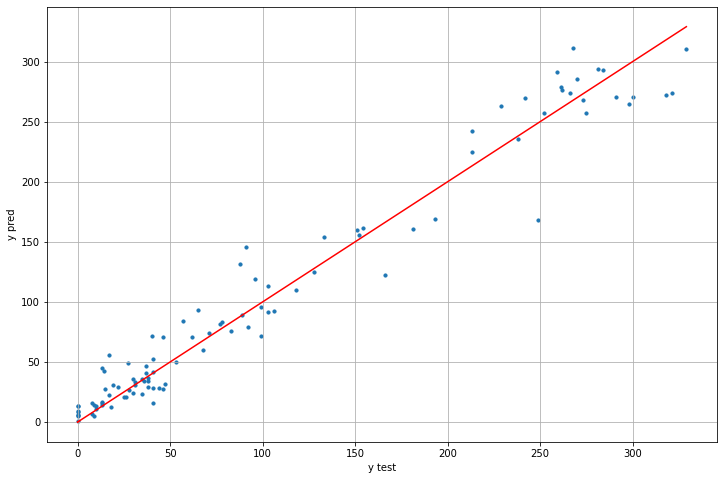

In [716]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(ytest,ypred,s=10)
plt.xlabel('y test'); plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(ytest)),np.linspace(0,max(ytest)),'r')
plt.grid()
plt.show()

<AxesSubplot:>

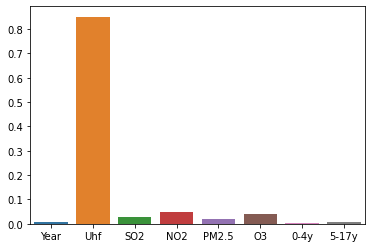

In [717]:
sns.barplot(y=rf.feature_importances_, x=Xtrain.columns)

<AxesSubplot:>

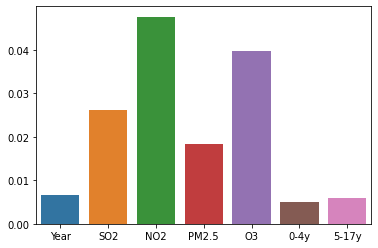

In [718]:
# importance without Uhf
temp1 = np.delete(rf.feature_importances_,1)
temp2 = Xtrain.columns.drop("Uhf")
sns.barplot(y=temp1, x=temp2)

<AxesSubplot:>

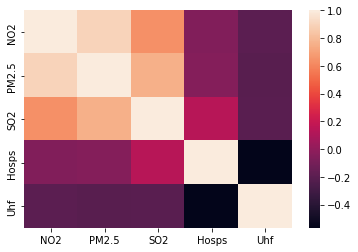

In [719]:
corr = df_ml[["NO2","PM2.5","SO2","Hosps","Uhf"]].corr()
sns.heatmap(corr,)

In [720]:
# # plot random forests prediction for each district. Quite a large thing

# for district in df_hosp_ml.district.unique(): # for each district
#     Xtest_district = Xtest[Xtest.district == district]
#     ytest_district = ytest.loc[Xtest_district.index]
#     ypred_district = rf.predict(Xtest_district)
#     print(district, explained_variance_score(ytest_district, ypred_district))
#     # plot
#     plt.figure(figsize=(8,4))
#     plt.scatter(ytest_district,ypred_district,s=10)
#     plt.xlabel('y test'); plt.ylabel('y pred')
#     plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
#     plt.plot(np.linspace(0,max(ytest_district)),np.linspace(0,max(ytest_district)),'r')
#     plt.grid()
#     plt.show()


## Linear regression and predictions

In [757]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
model.fit(X,y)
model.score(X,y)

0.4168701925888306

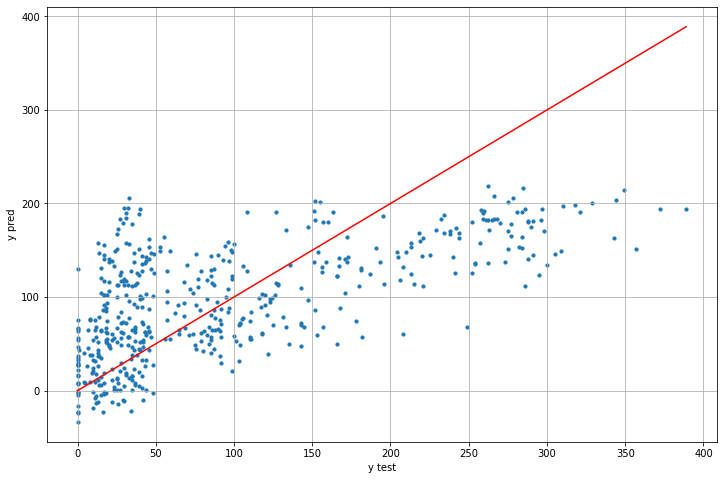

In [758]:
ypred = model.predict(X)

plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y,ypred,s=10)
plt.xlabel('y test'); plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(y)),np.linspace(0,max(y)),'r')
plt.grid()
plt.show()

In [773]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
model.fit(X,y)
model.score(X,y)

0.4168701925888306

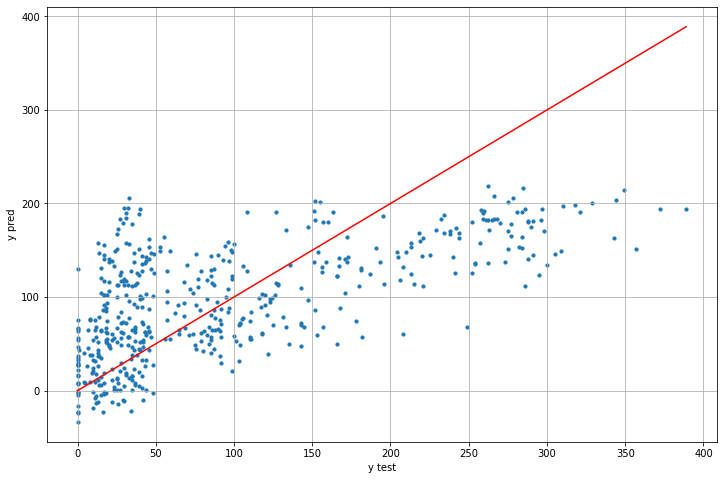

In [805]:
ypred = model.predict(X)

plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y,ypred,s=10)
plt.xlabel('y test'); plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(y)),np.linspace(0,max(y)),'r')
plt.grid()
plt.show()

In [808]:
X.shape

(504, 8)

In [775]:
X.mean()

Year     2011.666667
Uhf       288.428571
SO2         2.427302
NO2        22.028770
PM2.5       9.455556
O3         30.333452
0-4y        0.500000
5-17y       0.500000
dtype: float64

In [798]:
v = 100
sample = pd.DataFrame({
    "Year" : [2015]*v,
    "Uhf" : [240]*v,
    "SO2" : np.linspace(2.5,0,v),
    "NO2" : np.linspace(22,0,v),
    "PM2.5" : np.linspace(9.5,0,v),
    "O3" : np.linspace(30.5,0,v),
    "0-4y" : [0]*v,
    "5-17y" : [1]*v,
})
#model.predict(np.array(sample.loc[9,:]).reshape(1, -1))
model.predict(sample)

array([ 85.65872071,  88.07706258,  90.49540445,  92.91374632,
        95.33208819,  97.75043006, 100.16877194, 102.58711381,
       105.00545568, 107.42379755, 109.84213942, 112.26048129,
       114.67882316, 117.09716503, 119.5155069 , 121.93384877,
       124.35219064, 126.77053252, 129.18887439, 131.60721626,
       134.02555813, 136.4439    , 138.86224187, 141.28058374,
       143.69892561, 146.11726748, 148.53560935, 150.95395122,
       153.37229309, 155.79063497, 158.20897684, 160.62731871,
       163.04566058, 165.46400245, 167.88234432, 170.30068619,
       172.71902806, 175.13736993, 177.5557118 , 179.97405367,
       182.39239555, 184.81073742, 187.22907929, 189.64742116,
       192.06576303, 194.4841049 , 196.90244677, 199.32078864,
       201.73913051, 204.15747238, 206.57581425, 208.99415612,
       211.412498  , 213.83083987, 216.24918174, 218.66752361,
       221.08586548, 223.50420735, 225.92254922, 228.34089109,
       230.75923296, 233.17757483, 235.5959167 , 238.01

In [790]:
sample.loc[9,:]

Year     2030.0
Uhf       106.0
SO2         0.0
NO2         0.0
PM2.5       0.0
O3          0.0
0-4y        0.0
5-17y       1.0
Name: 9, dtype: float64

In [783]:
model.pred

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [780]:
np.linspace(30.5,0,10)

array([30.5       , 27.11111111, 23.72222222, 20.33333333, 16.94444444,
       13.55555556, 10.16666667,  6.77777778,  3.38888889,  0.        ])

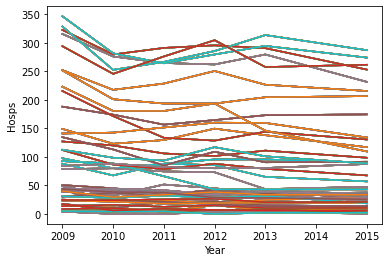

In [753]:
for uhf in df_ml.Uhf:
    sns.lineplot(data = df_ml, x = "Year", y = df_ml[df_ml.Uhf == uhf].Hosps, ci=None)

In [726]:
X

,Year,Uhf,SO2,NO2,PM2.5,O3,0-4y,5-17y
84,2009,404,2.41,19.23,8.98,26.29,1,0
85,2009,404,2.41,19.23,8.98,26.29,0,1
86,2009,203,3.19,25.17,9.93,24.33,1,0
87,2009,203,3.19,25.17,9.93,24.33,0,1
88,2009,209,2.10,21.48,9.18,26.86,1,0
...,...,...,...,...,...,...,...,...
667,2015,402,0.25,20.53,8.14,31.57,0,1
668,2015,211,0.22,20.82,8.67,31.10,1,0
669,2015,211,0.22,20.82,8.67,31.10,0,1
670,2015,503,0.12,14.11,7.10,31.66,1,0


In [727]:
df_ml_nn = df_ml[df_ml["5-17y"] == 1].drop(columns=["0-4y","5-17y"])
df_ml_nn.sort_values(by=["Uhf","Year"])

,Hosps,Year,Uhf,SO2,NO2,PM2.5,O3
129,31,2009,101,4.16,20.13,10.09,23.67
213,35,2010,101,5.31,20.79,10.65,31.91
297,32,2011,101,3.71,19.05,9.27,31.24
381,27,2012,101,2.23,18.23,8.88,33.72
465,46,2013,101,1.71,17.10,9.00,30.37
...,...,...,...,...,...,...,...
229,26,2010,504,1.56,13.50,9.29,36.53
313,23,2011,504,0.66,12.47,8.28,35.93
397,23,2012,504,0.39,11.51,7.82,35.27
481,22,2013,504,0.73,12.59,8.20,32.66


In [728]:
# neural forecasting
model = make_pipeline(StandardScaler(), MLPRegressor())




<AxesSubplot:xlabel='Year', ylabel='Hosps'>

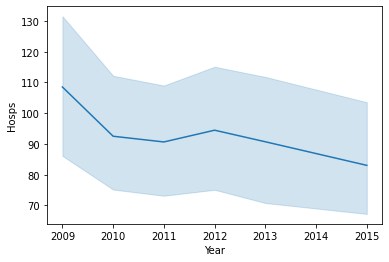

In [729]:
sns.lineplot(data=df_ml, x = "Year", y = "Hosps")

<AxesSubplot:xlabel='Year', ylabel='n'>

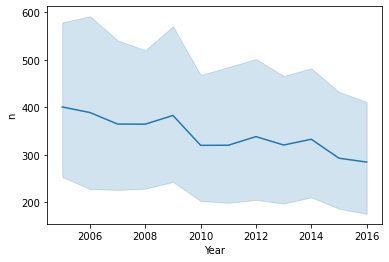

In [730]:
sns.lineplot(data=df_hosp2_melted, x = "Year", y = "n")

In [731]:
sample = pd.DataFrame({
    "year" : [2030]*10,
    "district" : [106]*10,
    "NO2" : list(np.linspace(0,40,10)),
    "PM2_5" : list(np.linspace(0,10,10)),
    "O3" : list(np.linspace(0,30,10)),
    "SO2" : list(np.linspace(0,1,10)),
    "0-4y" : [0]*10,
    "5-17y" : [1]*10,
})

rf.predict(sample)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PM2_5
- district
- year
Feature names seen at fit time, yet now missing:
- PM2.5
- Uhf
- Year

  warnings.warn(message, FutureWarning)


array([276.93, 305.01, 294.61, 293.98, 288.68, 288.68, 288.68, 288.68,
       288.68, 288.68])

In [732]:
sample = pd.DataFrame({
    "year" : range(2020,2070,5),
    "district" : [106]*10,
    "NO2" : [40]*10,
    "PM2_5" : [10]*10,
    "O3" : [30]*10,
    "SO2" : [1]*10,
    "0-4y" : [0]*10,
    "5-17y" : [1]*10,
})

rf.predict(sample)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PM2_5
- district
- year
Feature names seen at fit time, yet now missing:
- PM2.5
- Uhf
- Year

  warnings.warn(message, FutureWarning)


array([288.68, 288.68, 288.68, 288.68, 288.68, 288.68, 288.68, 288.68,
       288.68, 288.68])

In [733]:
sample = pd.DataFrame({
    "year" : [0],
    "district" : [116],
    "NO2" : [0],
    "PM2_5" : [0],
    "O3" : [0],
    "SO2" : [0],
    "0-4y" : [0],
    "5-17y" : [0],
})

rf.predict(sample)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PM2_5
- district
- year
Feature names seen at fit time, yet now missing:
- PM2.5
- Uhf
- Year

  warnings.warn(message, FutureWarning)


array([282.97])

In [734]:
# train small model
from sklearn.metrics import explained_variance_score
small_rf = RandomForestRegressor(100, max_depth=3)
small_rf.fit(Xtrain, ytrain)
ypred = small_rf.predict(Xtest)
explained_variance_score(ytest, ypred)


0.7959041571705983

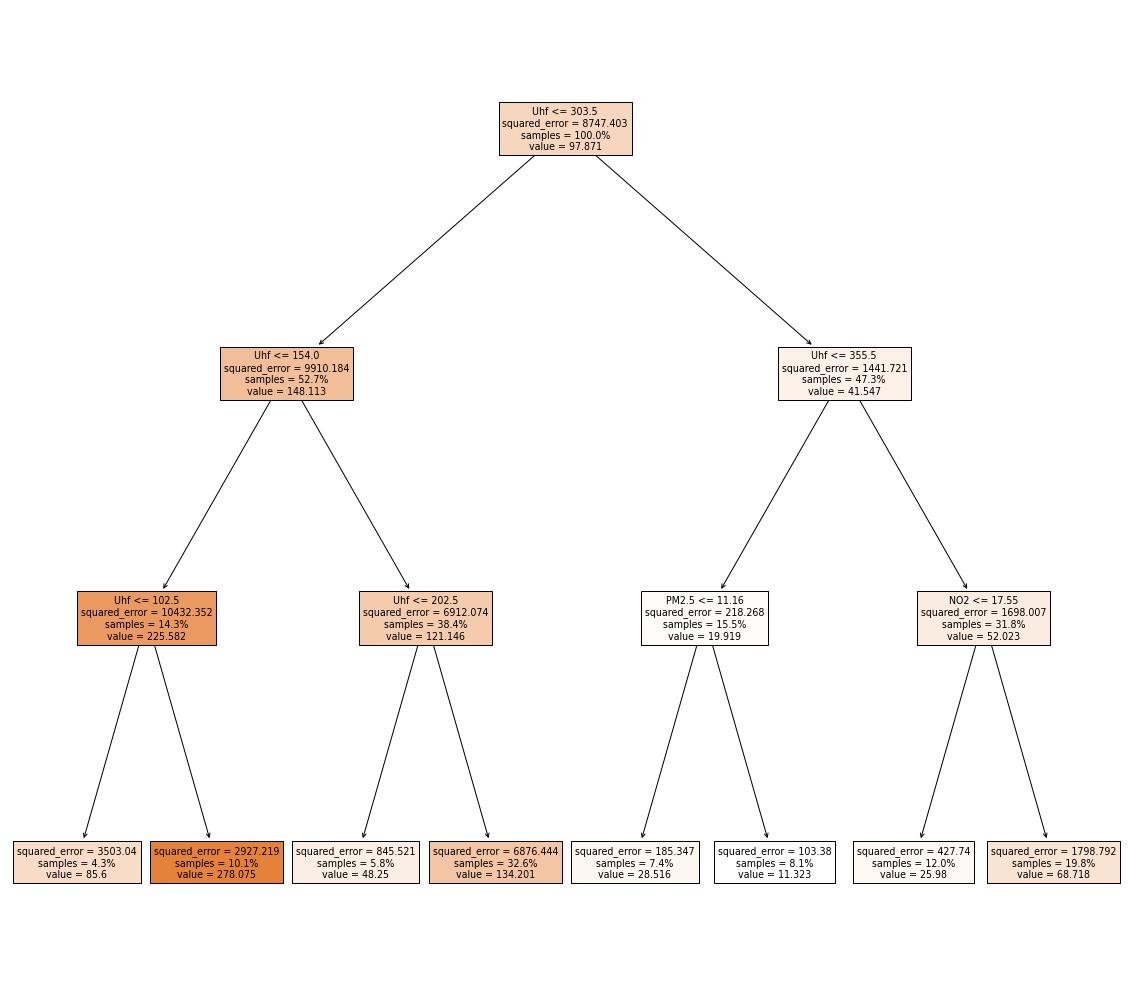

In [735]:
# extract small tree from model
from sklearn.tree import plot_tree

small_tree = small_rf.estimators_[0]
fig = plt.figure(figsize=(20,18))
_ = plot_tree(small_tree,
                feature_names=Xtrain.columns,  
                class_names=["Negative","Positive"],
                filled=True,
                proportion=True)

In [736]:
sample = pd.DataFrame({
    "year" : [0],
    "district" : [116],
    "NO2" : [0],
    "PM2_5" : [0],
    "O3" : [0],
    "SO2" : [0],
    "0-4y" : [0],
    "5-17y" : [0],
})

small_rf.predict(sample)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PM2_5
- district
- year
Feature names seen at fit time, yet now missing:
- PM2.5
- Uhf
- Year

  warnings.warn(message, FutureWarning)


array([272.99305966])

In [737]:
##### OLD NEURAL ######

In [738]:
X_norm = df_hosp_ml_norm.drop(columns="asthma_hosp")
y_norm = df_hosp_ml_norm.asthma_hosp

Xtrain, Xtest, ytrain, ytest = train_test_split(X_norm, y_norm, test_size = 0.2)

In [739]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=[200, 150, 25], max_iter=1000, solver = "adam", batch_size=100, early_stopping=True, validation_fraction=0.1)
nn.fit(Xtrain.values, ytrain.values)
ypred_nn = nn.predict(Xtest.values)
print("test:", explained_variance_score(ytest.values, ypred_nn))
# overfitted test
ypred_nn_overfit = nn.predict(Xtrain)
print("train:", explained_variance_score(ytrain.values, ypred_nn_overfit))


test: 0.6747209998057343
train: 0.7730431646623448


/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [740]:
sample = pd.DataFrame({
    "year" : [0],
    "district" : [106],
    "NO2" : [0],
    "PM2_5" : [0],
    "O3" : [0],
    "SO2" : [0],
    "0-4y" : [0],
    "5-17y" : [0],
})

rf.predict(sample)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PM2_5
- district
- year
Feature names seen at fit time, yet now missing:
- PM2.5
- Uhf
- Year

  warnings.warn(message, FutureWarning)


array([297.47])

In [741]:
# overfitted test
ypred_nn_overfit = nn.predict(Xtrain)
explained_variance_score(ytrain, ypred_nn_overfit)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


0.7730431646623448

<AxesSubplot:>

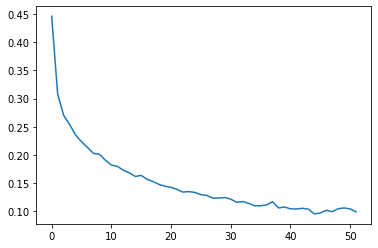

In [742]:
sns.lineplot(y = nn.loss_curve_, x = range(len(nn.loss_curve_)))

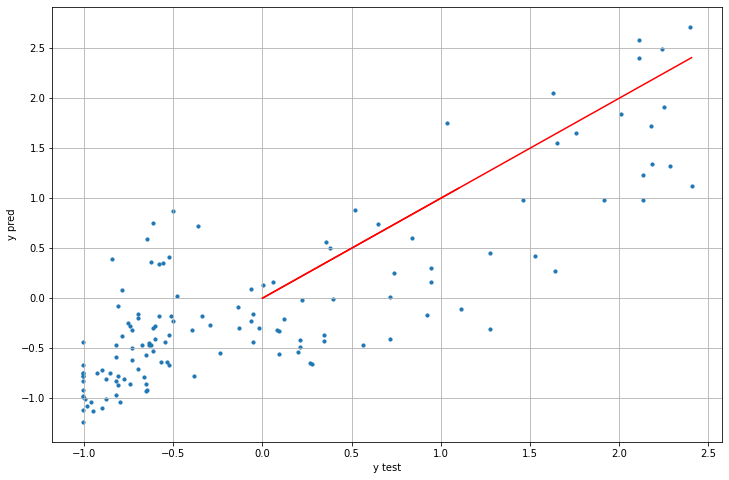

In [743]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(ytest,ypred_nn,s=10)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(ytest)),np.linspace(0,max(ytest)),'r')
plt.grid()
plt.show()

In [744]:
nn.predict(Xtest)[:10]

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


array([-0.40941046,  2.71528852, -0.29744255,  0.13195978,  1.64825871,
       -0.46428482,  2.49660584, -0.43368228, -0.15676409, -1.00915567])

In [745]:
ytest[:10]

229   -0.600808
94     2.394840
405   -0.128966
64     0.002711
179    1.758402
206    0.562337
429    2.241217
231   -1.006812
143   -0.052155
466   -0.875135
Name: asthma_hosp, dtype: float64

In [746]:
# With pipeline and without year
Xtrain_nn = Xtrain.drop(columns = "year")
Xtest_nn = Xtest.drop(columns = "year")
nn = MLPRegressor(hidden_layer_sizes=[250, 50, 5], max_iter=1000, solver = "adam", batch_size=10, early_stopping=True, validation_fraction=0.1)
model = make_pipeline(StandardScaler(), nn)
model.fit(Xtrain_nn,ytrain)
print(model.score(Xtrain_nn,ytrain))
model.score(Xtest_nn,ytest)

0.6516980412993775


0.5289802499725538

In [747]:
ypred_nn = model.predict(Xtest_nn)

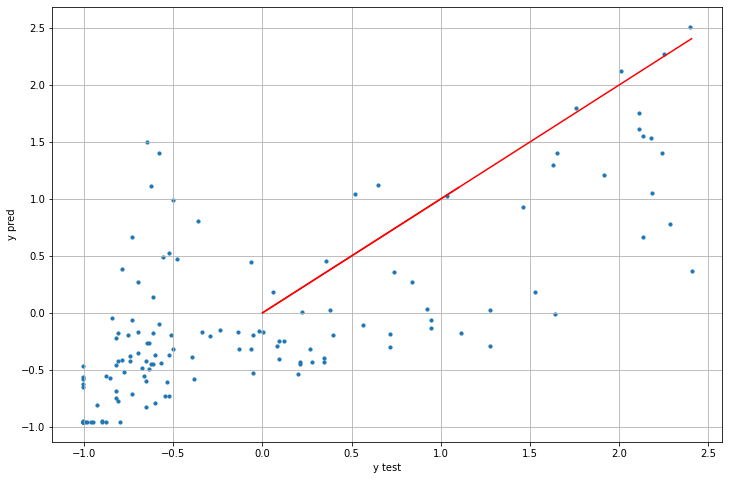

In [748]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(ytest,ypred_nn,s=10)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(ytest)),np.linspace(0,max(ytest)),'r')
plt.grid()
plt.show()

In [749]:
df_air_ml[df_air_ml.Uhf == 106][["Measure", "Value"]].groupby("Measure").mean()

KeyError: "None of [Index(['Measure', 'Value'], dtype='object')] are in the [columns]"

[-0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.8131177
 -0.75194559 -0.69077347 -0.62960135 -0.56842924 -0.50725712 -0.446085
 -0.26935184 -0.09110309  0.08787799  0.26765326  0.44742854  0.62720381
  0.80697908  0.98309907  1.14970556  1.29340997  1.42

<AxesSubplot:>

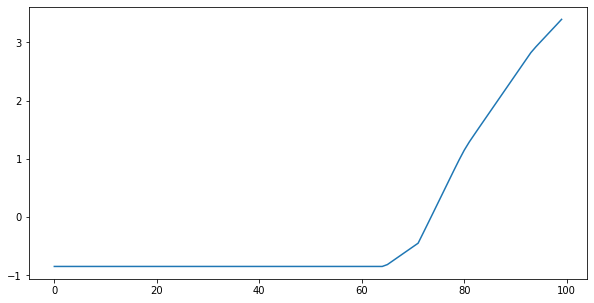

In [ ]:
res = 100

sample = pd.DataFrame({
    "district" : [106]*res,
    "NO2" : np.linspace(23,0,res),
    "PM2_5" : np.linspace(10,0,res),
    "O3" : np.linspace(30,0,res),
    "SO2" : np.linspace(5,0,res),
    "0-4y" : [0]*res,
    "5-17y" : [1]*res,
})
predictions = model.predict(sample)
print(predictions)

plt.figure(figsize=(10,5))
sns.lineplot(y = predictions, x = range(res), )

In [ ]:
df_hosp_ml_shift = df_hosp_ml[df_hosp_ml["0-4y"] == 0].drop(columns = ["0-4y","5-17y"]).sort_values(by = ["district", "year"]).reset_index(drop=True).rename(columns={"asthma_hosp":"n"})
df_hosp_ml_shift["next_n"] = df_hosp_ml_shift.n.shift(-1) # careful not to run multiple times
df_hosp_ml_shift = df_hosp_ml_shift[df_hosp_ml_shift.year != 2016] # all districts have max year 2016

df_hosp_ml_shift[:20]

,year,district,NO2,PM2_5,O3,SO2,n,next_n
0,2009,101,23.20,11.03,23.67,6.62,31,35.0
1,2010,101,20.13,10.09,31.91,4.16,35,32.0
2,2011,101,20.79,10.65,31.24,5.31,32,27.0
3,2012,101,19.05,9.27,33.72,3.71,27,46.0
4,2013,101,18.23,8.88,30.37,2.23,46,46.0
5,2014,101,17.10,9.00,30.45,1.71,46,29.0
6,2015,101,17.82,9.17,28.72,1.00,29,28.0
8,2009,102,22.39,10.68,26.82,5.38,127,133.0
9,2010,102,20.21,9.65,33.96,3.37,133,151.0
10,2011,102,21.06,10.48,33.44,4.25,151,157.0


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_hosp_ml_shift.drop, train_size=0.7)
ytrain

TypeError: Singleton array array(<bound method DataFrame.drop of      year  district    NO2  PM2_5     O3   SO2   n  next_n
0    2009       101  23.20  11.03  23.67  6.62  31    35.0
1    2010       101  20.13  10.09  31.91  4.16  35    32.0
2    2011       101  20.79  10.65  31.24  5.31  32    27.0
3    2012       101  19.05   9.27  33.72  3.71  27    46.0
4    2013       101  18.23   8.88  30.37  2.23  46    46.0
..    ...       ...    ...    ...    ...   ...  ..     ...
330  2011       504  13.50   9.29  35.93  1.56  23    23.0
331  2012       504  12.47   8.28  35.27  0.66  23    22.0
332  2013       504  11.51   7.82  32.66  0.39  22    19.0
333  2014       504  12.59   8.20  31.96  0.73  19    27.0
334  2015       504  11.91   7.29  34.07  0.22  27    12.0

[294 rows x 8 columns]>, dtype=object) cannot be considered a valid collection.

In [ ]:
# time shifted random forest thing
Xtrain.shift()
rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)
explained_variance_score(ytest, ypred)

0.9527312028733467

## end of Oliver code (for navigation)

In [ ]:
# end of olivers machine learning

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def apply_OneHotEncoder(data_col):
    # creating instance of one-hot-encoder
    enc = OneHotEncoder(handle_unknown='ignore')
    # passing bridge-types-cat column (label encoded values of bridge_types)
    enc_df = pd.DataFrame(enc.fit_transform(data_col).toarray())
    d={}
    for i in range (0,len(np.unique(data_col))):
        d[i]=enc.categories_[0][i]
    enc_df=enc_df.rename(columns=d)
    return enc_df

In [ ]:
districts_enc=apply_OneHotEncoder(sorted_df[['district']])
districts_enc.head()

,101,102,103,104,105,106,107,201,202,203,...,405,406,407,408,409,410,501,502,503,504
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
age_groups_enc=apply_OneHotEncoder(sorted_df[['age_group']])
age_groups_enc.head()

,0-4y,5-17y
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


Which is the most accurate way to handle Year values?

In [ ]:
pre_df=pd.concat([sorted_df.iloc[:,0],districts_enc,age_groups_enc,sorted_df.iloc[:,3:-1]],axis=1)
pre_df

,year,101,102,103,104,105,106,107,201,202,...,501,502,503,504,0-4y,5-17y,NO2,PM2_5,O3,SO2
0,2009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,23.20,11.03,23.67,6.62
1,2009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,23.20,11.03,23.67,6.62
2,2009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,22.39,10.68,26.82,5.38
3,2009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,22.39,10.68,26.82,5.38
4,2009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,24.82,11.10,24.47,9.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,14.93,6.80,34.18,0.13
668,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,14.11,7.10,34.68,0.12
669,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,14.11,7.10,34.68,0.12
670,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,11.52,6.59,36.17,0.11


In [ ]:
pre_df.columns

Index([ 'year',     101,     102,     103,     104,     105,     106,     107,
           201,     202,     203,     204,     205,     206,     207,     208,
           209,     210,     211,     301,     302,     303,     304,     305,
           306,     307,     308,     309,     310,     401,     402,     403,
           404,     405,     406,     407,     408,     409,     410,     501,
           502,     503,     504,  '0-4y', '5-17y',   'NO2', 'PM2_5',    'O3',
         'SO2'],
      dtype='object')

In [ ]:
y=np.array(sorted_df.iloc[:,-1])

#### Two issues here: How should I handle the year column? Should I normalize the y value?

Normalize the data:

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler()
names = pre_df.columns
d = scaler.fit_transform(pre_df)
X_pre = pd.DataFrame(d, columns=names)
X_pre=X_pre.sort_values(by=['year'])
X_pre

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,year,101,102,103,104,105,106,107,201,202,...,501,502,503,504,0-4y,5-17y,NO2,PM2_5,O3,SO2
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.367494,0.558011,0.311957,0.542048
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.351147,0.461878,0.420356,0.364696
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.449544,0.553591,0.395945,0.438801
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.449544,0.553591,0.395945,0.438801
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.464634,0.598895,0.411667,0.416320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.245520,0.267403,0.709557,0.004996
610,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.245520,0.267403,0.709557,0.004996
609,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.212197,0.201105,0.750103,0.008326
617,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.119145,0.125967,0.813405,0.005828


In [ ]:
train_idx=450
X_train=X_pre[:train_idx];X_test=X_pre[train_idx:]
y_train=y[:train_idx];y_test=y[train_idx:]

Train a model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model= RandomForestRegressor(n_estimators=50,n_jobs=-1)
model.fit(X_train,y_train)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(n_estimators=50, n_jobs=-1)

In [ ]:
y_pred=model.predict(X_test)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
explained_variance_score(y_test, y_pred)

0.16772486900725236

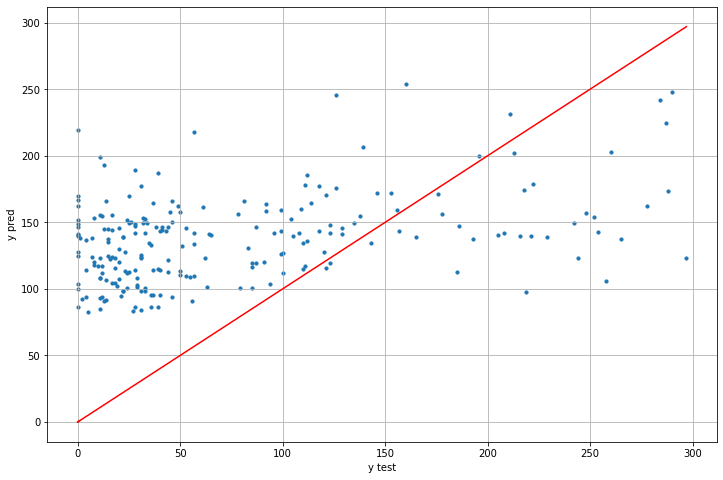

In [ ]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,y_pred,s=10)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

Poor results, although some correlation can be observed. However, results can be explained with plots like this one, where the first years air pollution and asthma hospitalization have similar levels, even though the last years they diverge a lot.

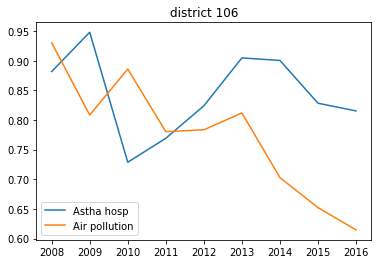

In [ ]:
plot_pollution_per_district(106)

### Missing some hyperparameter tunning

#### Some plots of the data extracted for the model

In [ ]:
sorted_df.head()

,year,district,age_group,NO2,PM2_5,O3,SO2,asthma_hosp
0,2009,101,0-4y,23.20,11.03,23.67,6.62,30
1,2009,101,5-17y,23.20,11.03,23.67,6.62,31
2,2009,102,0-4y,22.39,10.68,26.82,5.38,155
3,2009,102,5-17y,22.39,10.68,26.82,5.38,127
4,2009,103,0-4y,24.82,11.10,24.47,9.48,349


Let's see how the data evolved per district:

In [ ]:
import plotly.express as px


fig = px.scatter(sorted_df, x="PM2_5", y="asthma_hosp", color="year")
fig.show()

### More PM2.5 values do not strictly mean more asthma hospitalizations

Even though some positive correlation can be observed between the levels of PM2.5 and the number of asthma hospitalizations, it is clear that they are not strictly correlated. Note that levels of PM2.5 decrease by year, even though the number of hospitalizations still remains quite high in certain districts.

Let's dig more into this phenomenon to find which may be the cause of this effect.

In [ ]:
fig = px.scatter(sorted_df, x="NO2", y="asthma_hosp", color="year")
fig.show()

In [ ]:
fig = px.scatter(sorted_df, x="O3", y="asthma_hosp", color="year")
fig.show()

In [ ]:
fig = px.scatter(sorted_df, x="SO2", y="asthma_hosp", color="year")
fig.show()

Let's add the broroughs of each district as an extra column in the dataframe in order to facet the plots.

In [ ]:
nyc_ares=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
sorted_df['Boroughs']=[nyc_ares[int(str(el)[0])-1] for el in sorted_df.district]
sorted_df.head()

,year,district,age_group,NO2,PM2_5,O3,SO2,asthma_hosp,Boroughs
0,2009,101,0-4y,23.20,11.03,23.67,6.62,30,Bronx
1,2009,101,5-17y,23.20,11.03,23.67,6.62,31,Bronx
2,2009,102,0-4y,22.39,10.68,26.82,5.38,155,Bronx
3,2009,102,5-17y,22.39,10.68,26.82,5.38,127,Bronx
4,2009,103,0-4y,24.82,11.10,24.47,9.48,349,Bronx


In [ ]:
fig = px.scatter(sorted_df, x="PM2_5", y="asthma_hosp", color="year",trendline="ols", facet_col="Boroughs")
fig.show()

Staten Island data is boring, so let's just delete it from the plot.

In [ ]:
non_staten_df=sorted_df[sorted_df.Boroughs!="Staten Island"]

fig = px.scatter(non_staten_df, x="PM2_5", y="asthma_hosp", color="year",trendline="ols", facet_col="Boroughs")
fig.show()

## When the trendline highly varies depending on the district we are located

Something really interesting can be observed here, and is the fact that really different regression trendlines can be observed depending on the neighbourhood. While in the Bronx the number of asthma hospitalizations strongly increases as the levels of PM2.5 increase, in Manhattan happens exactly the opposite. 

Bronx, Brookykn and Queens district seem to show the expected behaviour. As levels of PM2.5 increase, air becomes more polluted, and so the number of hospitalizations increases. However, why does the number of hospitalizations decrease in Manhattan as the levels of air pollution increase?

If we go to check the [Median Household Income](https://www.baruch.cuny.edu/nycdata/income-taxes/med_hhold_income.htm) on 2017 in NYC, we observe that the Bronx has the lowest value with a Median Household Income of 37.397 \\$ , while Manhattan has a value up to 85.071 \\$.

In [ ]:
# Let's study just the Manhattan particular case
man_df=sorted_df[sorted_df.Boroughs=="Manhattan"]
man_df.head()

,year,district,age_group,NO2,PM2_5,O3,SO2,asthma_hosp,Boroughs
36,2009,301,0-4y,28.50,11.55,21.82,11.12,85,Manhattan
37,2009,301,5-17y,28.50,11.55,21.82,11.12,83,Manhattan
38,2009,302,0-4y,31.06,11.60,21.52,8.21,127,Manhattan
39,2009,302,5-17y,31.06,11.60,21.52,8.21,171,Manhattan
40,2009,303,0-4y,29.90,11.55,22.84,7.04,128,Manhattan


In [ ]:
fig = px.scatter(man_df, x="PM2_5", y="asthma_hosp",trendline="ols", facet_col="Boroughs",
                 color="district")
fig.show()

It can be seen how, even though higher levels of PM2.5, the lower Manhattan districts have less asthma hospitalizations. Two hypothesis can be extracted here:
1-Less asthma cases because less hospitals/population
2-Less asthma cases because better healthcare
3-Less asthma cases because PM2.5 is not correlated at all to asthma.

In [ ]:
fig = px.scatter(sorted_df, x="PM2_5", y="asthma_hosp", color="year",trendline="ols", facet_col="Boroughs")
fig.show()

### Ozone (O3) per borough and age group

In [ ]:
fig = px.scatter(sorted_df, x="O3", y="asthma_hosp", color="year",trendline="ols", 
                 facet_row="age_group",facet_col="Boroughs")
fig.show()

In [ ]:
fig = px.scatter(sorted_df, x="O3", y="asthma_hosp", color="year",trendline="ols", 
                 facet_row="age_group",facet_col="Boroughs")
fig.show()